<a href="https://colab.research.google.com/github/DaiVo20/Stock-Price-Prediction/blob/main/MovingAverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
dataset=pd.read_csv("/content/stock_data.csv", parse_dates=['Date'])


In [7]:
companies = dataset['Stock'].unique()
print(companies)

['AAPL' 'TSLA' 'MSFT' 'FB']


In [8]:
stocks ={}
for i in companies:
  stocks[i] = dataset[dataset['Stock'] == i][["Date", "Close"]]
  print(stocks[i])

            Date      Close
0     1984-09-07    0.42388
1     1984-09-10    0.42134
2     1984-09-11    0.42902
3     1984-09-12    0.41618
4     1984-09-13    0.43927
...          ...        ...
8359  2017-11-06  173.63000
8360  2017-11-07  174.18000
8361  2017-11-08  175.61000
8362  2017-11-09  175.25000
8363  2017-11-10  174.67000

[8364 rows x 2 columns]
             Date   Close
8364   2010-06-28   17.00
8365   2010-06-29   23.89
8366   2010-06-30   23.83
8367   2010-07-01   21.96
8368   2010-07-02   19.20
...           ...     ...
10217  2017-11-06  302.78
10218  2017-11-07  306.05
10219  2017-11-08  304.31
10220  2017-11-09  302.99
10221  2017-11-10  302.99

[1858 rows x 2 columns]
             Date     Close
10222  1986-03-13   0.07533
10223  1986-03-14   0.07533
10224  1986-03-17   0.07533
10225  1986-03-18   0.07533
10226  1986-03-19   0.07533
...           ...       ...
18200  2017-11-06  84.47000
18201  2017-11-07  84.26000
18202  2017-11-08  84.56000
18203  2017-11-09  84.

In [ ]:
#sort dataset by Date (past->now)
dataset['Date'] =pd.to_datetime(dataset.Date)
dataset.sort_values(by='Date')

In [ ]:
dataset.set_index('Date')

In [8]:
my_data=dataset[['Date','Close']]

In [9]:
my_data

,Date,Close
0,1984-09-07,0.42388
1,1984-09-10,0.42134
2,1984-09-11,0.42902
3,1984-09-12,0.41618
4,1984-09-13,0.43927
...,...,...
19581,2017-11-06,180.17000
19582,2017-11-07,180.25000
19583,2017-11-08,179.56000
19584,2017-11-09,179.30000


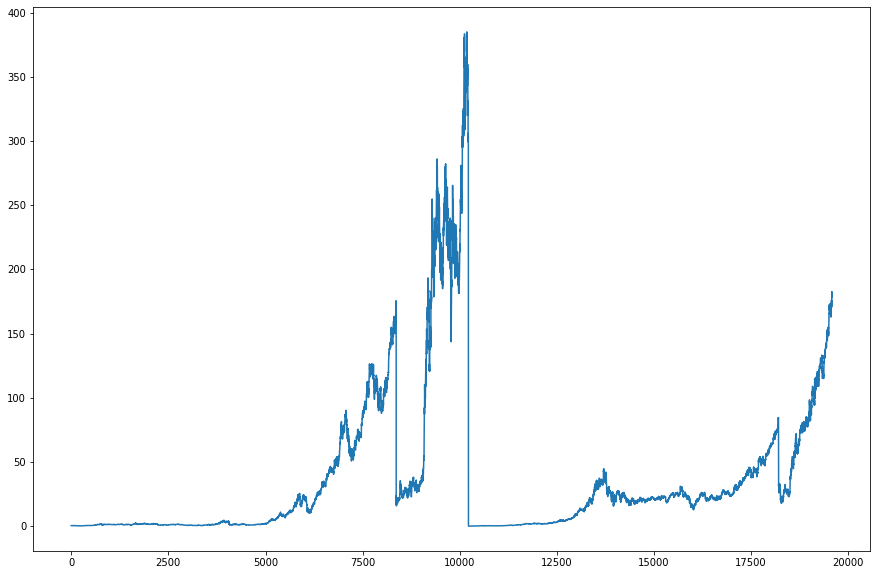

In [71]:
#Visualize Close values from past->now
dataset['Close'].plot(figsize=(15,10))

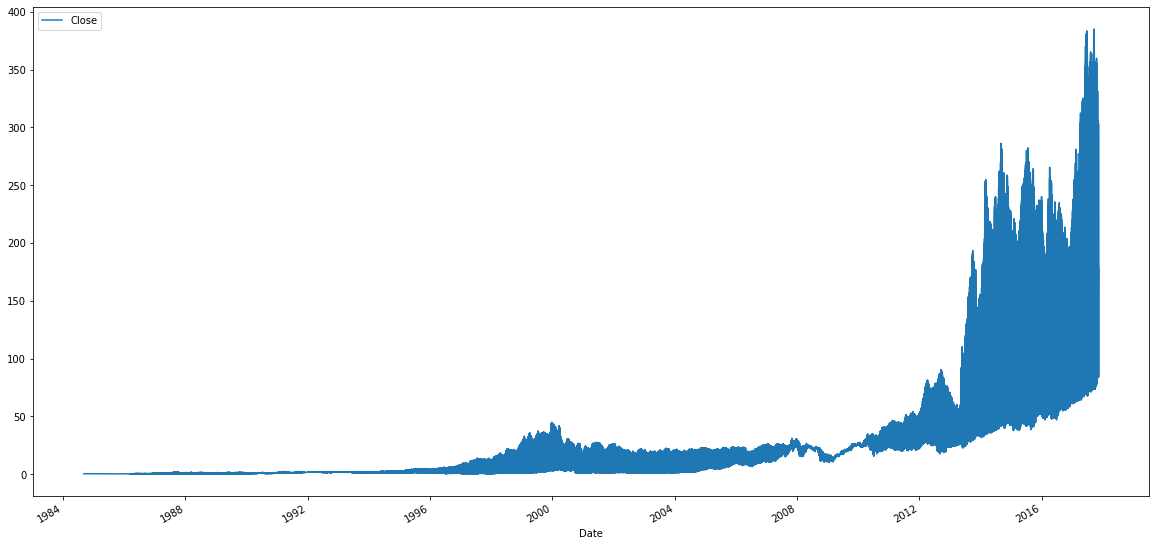

In [10]:
my_data.plot(x='Date', y='Close', figsize=(20,10))

In [11]:
n=70
train_data=my_data.head(int(len(dataset)*(n/100)))

In [12]:
m=30
test_data=my_data.tail(int(len(dataset)*(m/100)))

In [13]:
test_data

,Date,Close
13711,2000-01-04,42.373
13712,2000-01-05,42.818
13713,2000-01-06,41.386
13714,2000-01-07,41.921
13715,2000-01-10,42.230
...,...,...
19581,2017-11-06,180.170
19582,2017-11-07,180.250
19583,2017-11-08,179.560
19584,2017-11-09,179.300


In [14]:
train_data

,Date,Close
0,1984-09-07,0.42388
1,1984-09-10,0.42134
2,1984-09-11,0.42902
3,1984-09-12,0.41618
4,1984-09-13,0.43927
...,...,...
13705,1999-12-27,44.81400
13706,1999-12-28,44.20200
13707,1999-12-29,44.36900
13708,1999-12-30,44.25100


In [15]:
model = ARMA(train_data['Close'], order=(0,1))

In [16]:
model_fit = model.fit(disp=False)

const          35.464568
ma.L1.Close     0.968837
dtype: float64
